# MNIST Digit Recognition
Dense Network:
- Input Layer (28x28, flattened)
- Dense Layer (512 nodes, ReLU)
  - Dropout (0.2)
- Dense Layer (10 nodes, softmax)

Training Parameters:
- Optimizer: Adam [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980v8)
- Loss: Sparse Categorical Crossentropy
- Metric: Accuracy

Training Data:
- MNIST Digits (from [tf.keras.datasets](https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/keras/datasets))
- Handwritten digits, 28 x 28 pixel grayscale images

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 25s 12ms/step - loss: 0.2211 - accuracy: 0.9344
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0992 - accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0676 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0532 - accuracy: 0.9825
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0598 - accuracy: 0.9806


[0.059799518436193466, 0.9805999994277954]

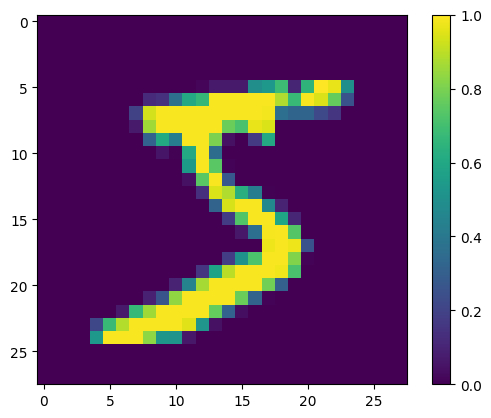

In [2]:
# Helper libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [3]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [4]:
predictions[0]

array([6.6318933e-08, 1.2067718e-08, 4.9746745e-07, 1.8724374e-04,
       3.3540848e-12, 4.6811842e-08, 7.5469752e-13, 9.9980450e-01,
       9.8839983e-08, 7.4764680e-06], dtype=float32)

In [5]:
np.argmax(predictions[0])

7

In [6]:
y_test[0]

7

In [9]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

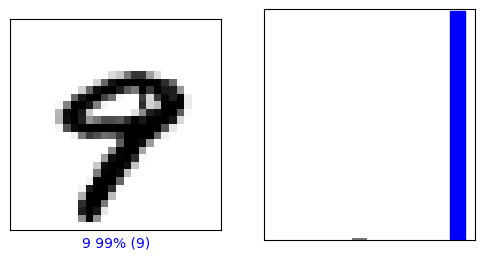

In [12]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()